# Digital Signal Processing
## Homework Assignment №1
---
## Anton Buguev BS19-RO-01
#### a.buguev@innopolis.university
#### 10 April 2022

## Task 1: Noise Reduction

### 1. Calculate original functions $y(t)$ and $y_{\epsilon}(t)$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

n = 750 # number of subinervals
T = np.linspace(0, 1, n) # time array
y = [] # values of y(t)
# calculate values of y(t) for each timestep
for t in T:
    y.append(np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t))
y = np.array(y)

eps = np.random.uniform(-5, 5, (n,)) # list of random errors
y_eps = y + eps # list that contains values of y_eps(t)

#### Visualize functions $y(t)$ and $y_{\epsilon}(t)$

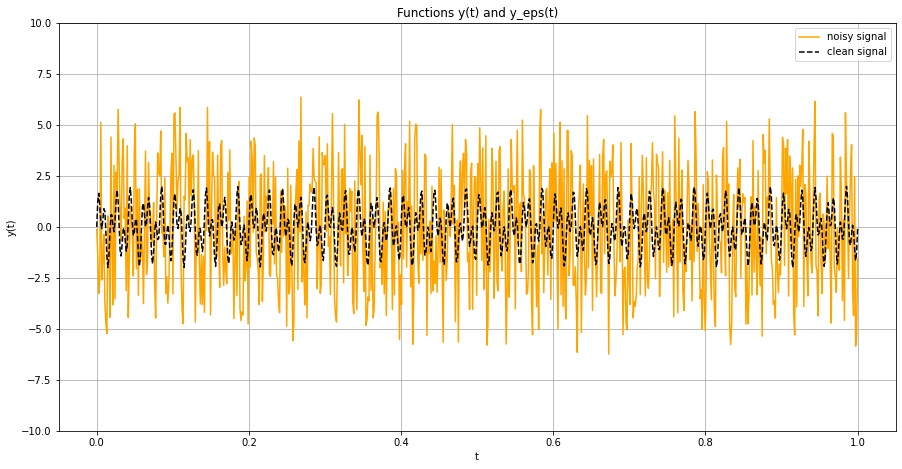

In [2]:
# visualization of 2 functions
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.plot(T, y_eps, color='orange',  label="noisy signal") # noisy signal
ax.plot(T, y, '--', color='black', label="clean signal") # clean signal
ax.set_title("Functions y(t) and y_eps(t)")
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.set_ylim((-10,10))
ax.legend()
ax.grid()
plt.show()

### 2. FFT of $y_{\epsilon}(t)$

In [3]:
z = np.fft.fft(y_eps) # FFT of y_eps(t)

### 3. PDS of $y_{\epsilon}(t)$

In [4]:
z_conj = np.conjugate(z) # conjugate of FFT
PDS = z * z_conj / len(z) # Power Density Spectrum 

#### Visualize PDS

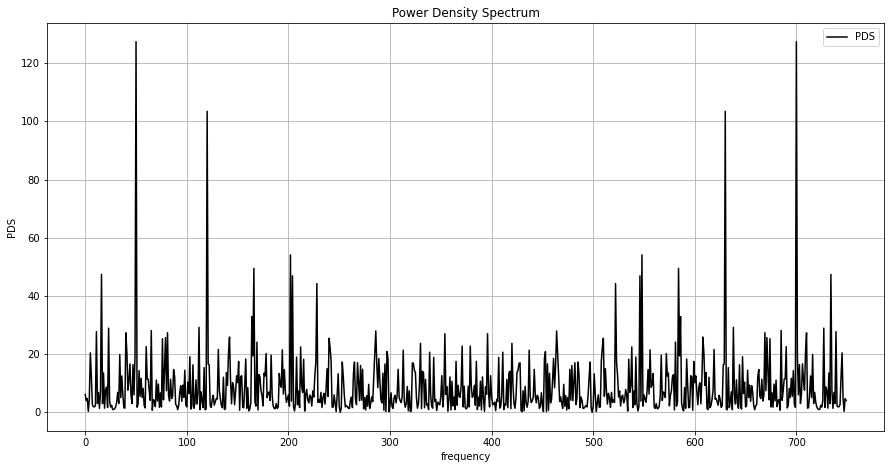

In [5]:
# Visualisation of PDS
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.plot(PDS.real, color='black',  label="PDS")
ax.set_title("Power Density Spectrum")
ax.set_xlabel("frequency")
ax.set_ylabel("PDS")
ax.legend()
ax.grid()
plt.show()

### 4. Filter elements of PDS

In [6]:
tau = 100 # threshold
indices1 = [] # list of indices for the 1st task
# lists of PDS values, one will contain values which satisfy threshold,
# the second will contain elements which do not satisfy
# used for proper visualization
PDS_th, PDS_not = PDS.copy(), PDS.copy() 
# Check every element of PDS
for i in range(len(PDS)):
    # if its value is smaller than our threshold,
    # then we keep its index and set to 0 corresponding element in list of not appropriate values
    # to visualize them later
    if PDS[i] < tau:
        indices1.append(i)
        PDS_not[i] = 0
    # otherwise, if it does not satisfy thershold, 
    # we set to 0 correspondin element in list of appropriate values
    else:
        PDS_th[i] = 0

#### Visualize filtered PDS

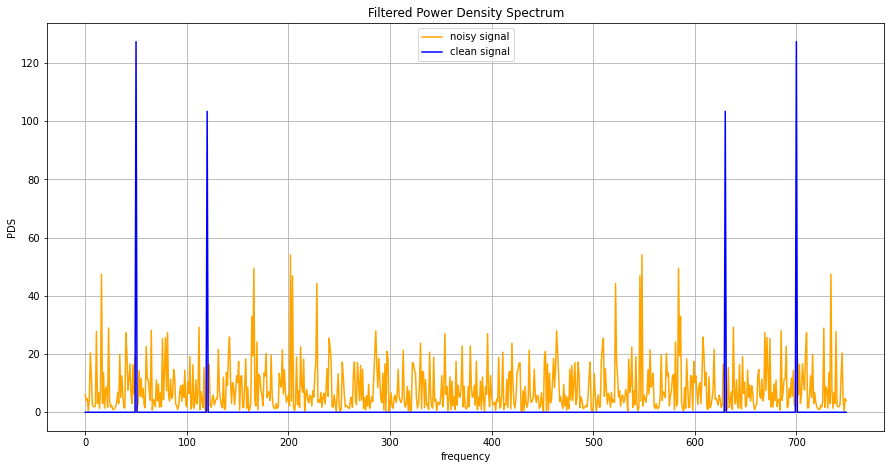

In [7]:
# Visualization of updated PDS
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.plot(PDS_th.real, color='orange',  label="noisy signal")
ax.plot(PDS_not.real, color='blue',  label="clean signal")
ax.set_title("Filtered Power Density Spectrum")
ax.set_xlabel("frequency")
ax.set_ylabel("PDS")
ax.legend()
ax.grid()
plt.show()


### 5. Update values of $z=\mathcal{F}\{y_{\epsilon}(t)\}(\omega)$ and calculate inverse FFT

In [8]:
z_upd = z.copy() # list of values of FFT which we will update
# if we saved an index of an element on previous step, then we have to set it to 0
z_upd[indices1] = 0

z_inv = np.fft.ifft(z_upd) # inverse FFT of updated values

#### Visualize inverse FFT

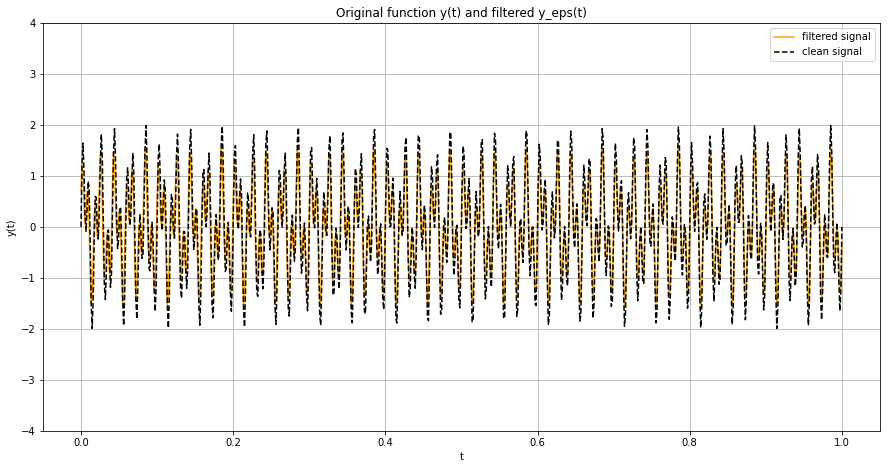

In [9]:
# visualize original function y(t) and updated function y_eps(t)
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.plot(T, z_inv.real, color='orange',  label="filtered signal") # filtered signal
ax.plot(T, y, '--', color='black',  label="clean signal") # original clean signal
ax.set_title("Original function y(t) and filtered y_eps(t)")
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.set_ylim((-4,4))
ax.legend()
ax.grid()
plt.show()

## Task 2: Image Compression

### Import image

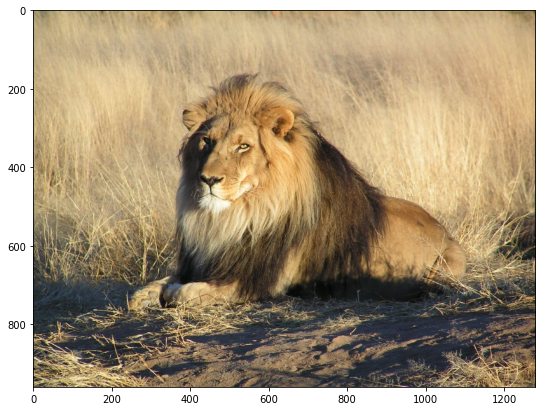

In [10]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('Lion.jpg') # import original image
w_im, h_im, c = np.array(img.shape) // 100
fig, ax = plt.subplots(1, 1, figsize=(w_im, h_im))
ax.imshow(img) # show image

### 1. Convert image to grayscale format

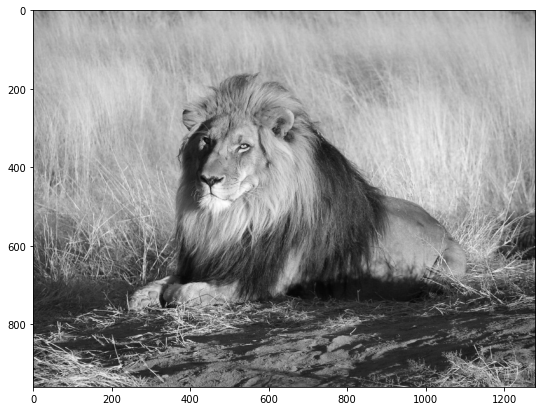

In [11]:
# Imapementation is taken from https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2] # RGB channels of original image
A = 0.2989 * R + 0.5870 * G + 0.1140 * B # grayscale image
fig, ax = plt.subplots(1, 1, figsize=(w_im, h_im))
ax.imshow(A, cmap='gray') # show image

### 2. Claculate 2-dimensional FFT and shift zero-frequency of FFT ot the center

In [30]:
F2_sh = np.fft.fftshift(np.fft.fft2(A)) # shifted 2-dimensional FFT

### 3. Absolute value of shifted matrix

In [31]:
F2_abs = np.abs(F2_sh) # absolute value of shifted spectrum

### 4. Logarithm of absolute values

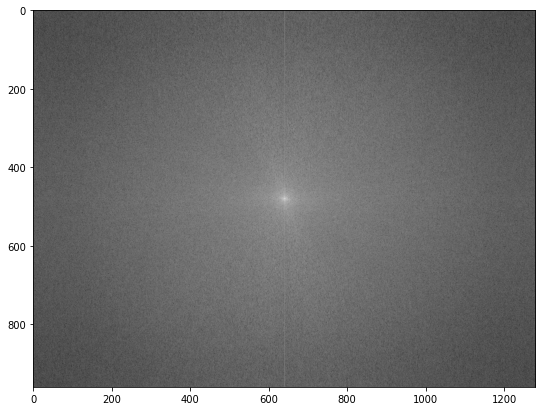

In [32]:
F2_log = np.log(F2_abs + 1) # logarithm of absolute values of shifted spectrum

fig, ax = plt.subplots(1, 1, figsize=(w_im, h_im))
ax.imshow(F2_log, cmap='gray') # show image spectrum

### 5. Reshape shifted 2D-FFT from $(w,h)$ to $(w\cdot h, 1)$

In [15]:
w, h = F2_sh.shape # sizes of image
F2_resh = np.reshape(F2_sh, (w * h, 1)) # Reshaped shifted matrix

### 6. Absolute value of reshaped matrix

In [16]:
Af = np.abs(F2_resh) # absolute values of reshaped matrix

### 7. Sorted absolute values of reshaped matrix

In [17]:
a = np.sort(Af, axis=0) # sorted matrix

### 8. Find index of threshold

In [18]:
tau = 0.03 # coefficient to calculate index
b = int(np.floor((1 - tau) * w * h)) # index of threshold

### 9. Find threshold element from sorted array with index $b$

In [19]:
c = a[b][0] # threshold value

### 10. Zero our small coefficients of sorted array and kkep indeces of elements that are higher than threshold

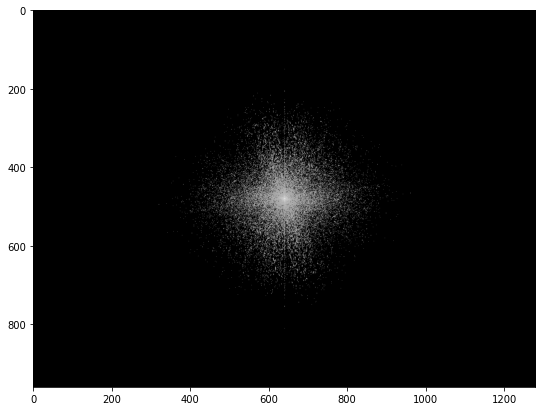

In [35]:
indices2 = [] # list of indices of appropriate elements for 2nd task
F2_upd = np.reshape(F2_log, (w*h, 1)) # list of logarithm values which we will update
for i in range(w*h):
    # if element is less than threshold, then we keep its index
    if Af[i][0] < c:
        indices2.append(i)
        F2_upd[i][0] = 0.0
        

# reshpe array back to sizes (w, h) to visualize it
# and make dtype='uint8' otherwise it will not display
F2_upd = np.array(np.reshape(F2_upd, (w,h)), dtype='uint8')

# visualize filtered spectrum
fig, ax = plt.subplots(1, 1, figsize=(w_im, h_im))
ax.imshow(F2_upd, cmap='gray')

### 11. Return to original FFT matrix and reconstruct original image

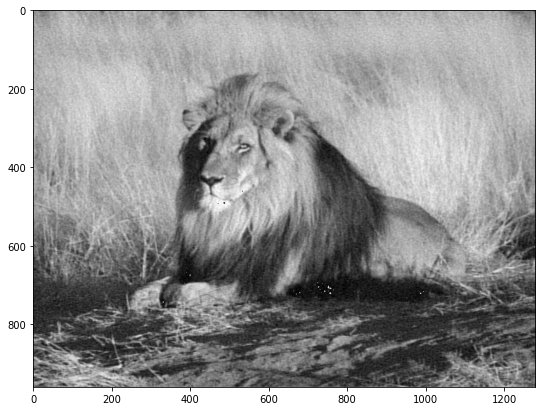

In [36]:
F2_final = np.reshape(F2_sh, (w*h, 1)) # reshape shifted FFT matrix to sizes (w*h, 1) for convenient work with indices
# for each element which index we saved we should find absolute value, 
# add 1, calculate natural logarithm and update its value
F2_final[indices2] = np.log(np.abs(F2_final[indices2]) + 1)

F2_final = np.reshape(F2_final, (w, h)) # reshape updated matrix to sizes (w,h)
F2_final = np.fft.ifftshift(F2_final) # perform inverse shift
F2_final_inv = np.array(np.fft.ifft2(F2_final).real, dtype='uint8') # calculate inverse 2D-FFT

# visualize reconstructed image
fig, ax = plt.subplots(1, 1, figsize=(w_im, h_im))
ax.imshow(F2_final_inv, cmap='gray')